### Multi-Output Text Classification

+ Binary Classification: target has either 0 or 1
+ Multi-Class: A classification problem consisting of more than two classes. 
+ Multi-Label: A target can have more than two labels at the same time
+ Multi-output: A target where each sample has multiple classification/regression labels
    - Multiclass-multioutput classification (also known as multitask classification) is a classification task which labels each sample with a set of non-binary properties. 
    - Both the number of properties and the number of classes per property is greater than 2.
    

### Libraries
+ Scikit-Learn
    - sklearn.multioutput
+ Scikit-Multi-Learn
+ Tensorflow
+ Pytorch
+ etc


In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [2]:
# Load Data Viz Pkgs
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# Others
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [111]:
# Load Dataset
df = pd.read_csv("/Users/zachalabastro/Desktop/[SPROUT] CA Project 2.0/[SPROUT] 02 Sample External Dataset - Sheet1.csv")
df = df.rename(columns=lambda x: x.strip())
df[['Client Complaint', 'Ticket Body']]

,Client Complaint,Ticket Body
0,GSave Inaccessible Account,"Dear GCash Support, I am facing urgent issues ..."
1,GInvest Portfolio Sync Issue,"Dear GCash Support, I have recently noticed di..."
2,GInsure Claim Processing Delay,"Dear GCash Support, I submitted a claim under ..."
3,GCredit Reconciliation Error,"Dear GCash Support, My GCredit account is show..."
4,GPadala Transfer Issue,"Dear GCash Support, I've attempted to send mon..."
5,GLife App Integration Fault,"Dear GCash Support, GLife is not integrating w..."
6,GForest Carbon Footprint Miscalculation,"Dear GCash Support, My GForest account is not ..."
7,GLoan Application Glitch,"Dear GCash Support, I am experiencing a recurr..."
8,GPay QR Code Reader Malfunction,"Dear GCash Support, The QR code reader within ..."
9,GRemit Transaction Delay,"Dear GCash Support, There's a significant dela..."


In [96]:
df.head()

,Client Complaint,Ticket Body,Type of Product,Priority,Type of Complaint,Support Level
0,GSave Inaccessible Account,"Dear GCash Support, I am facing urgent issues ...",GSave,Urgent,Account Access,1
1,GInvest Portfolio Sync Issue,"Dear GCash Support, I have recently noticed di...",GInvest,Urgent,Account Issue,1
2,GInsure Claim Processing Delay,"Dear GCash Support, I submitted a claim under ...",GInsure,Urgent,Claim Issue,3
3,GCredit Reconciliation Error,"Dear GCash Support, My GCredit account is show...",GCredit,Not Urgent,Billing Error,2
4,GPadala Transfer Issue,"Dear GCash Support, I've attempted to send mon...",GPadala,Urgent,Transaction Failure,2


In [97]:
df['Type of Product'].nunique()

12

In [98]:
# Class 1/Target 1/Output 1 Distribution
df['Type of Product'].value_counts()

GCredit     4
GInvest     3
GInsure     3
GLife       3
GForest     3
GLoan       3
GPay        3
GRemit      3
GPadala     2
GSave       1
GBills      1
GMessage    1
Name: Type of Product, dtype: int64

<Axes: xlabel='Type of Product', ylabel='count'>

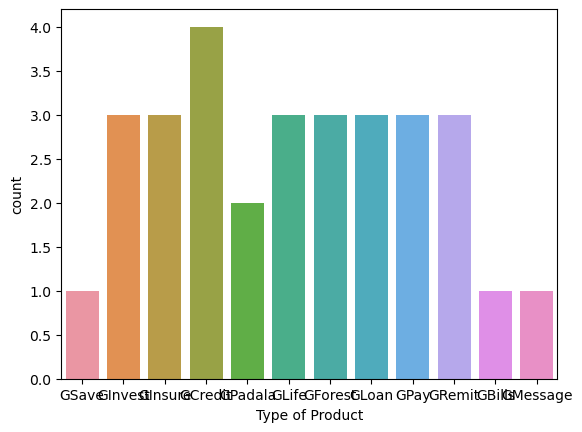

In [99]:
sns.countplot(x='Type of Product',data=df)

In [100]:
# Class 2/Target 2/Output 2 Distribution
df['Priority'].value_counts()

Urgent        15
Normal         9
Not Urgent     6
Name: Priority, dtype: int64

In [106]:
# Class 3/Target 3/Output 3 Distribution
df['Type of Complaint'].value_counts()

Account Issue          4
Transaction Failure    4
Technical Issue        4
Claim Issue            2
Account Access         1
Billing Error          1
Application Error      1
Payment Issue          1
Disbursement Issue     1
Service Issue          1
Activation Error       1
Name: Type of Complaint, dtype: int64

In [102]:
# Class 4/Target 4/Output 4 Distribution
df['Support Level'].value_counts()

2    9
1    8
3    8
4    5
Name: Support Level, dtype: int64

<Axes: xlabel='Priority', ylabel='count'>

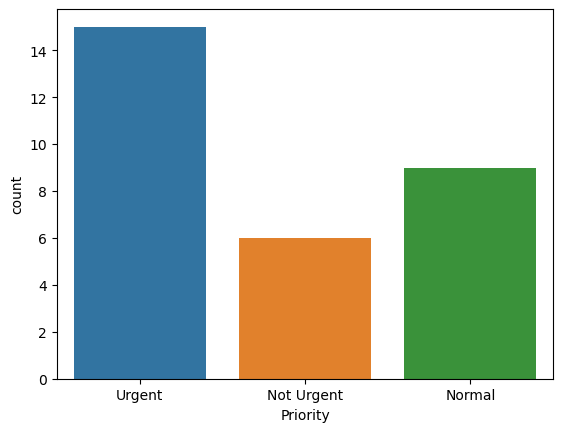

In [103]:
sns.countplot(x='Priority',data=df)

<Axes: xlabel='Type of Complaint', ylabel='count'>

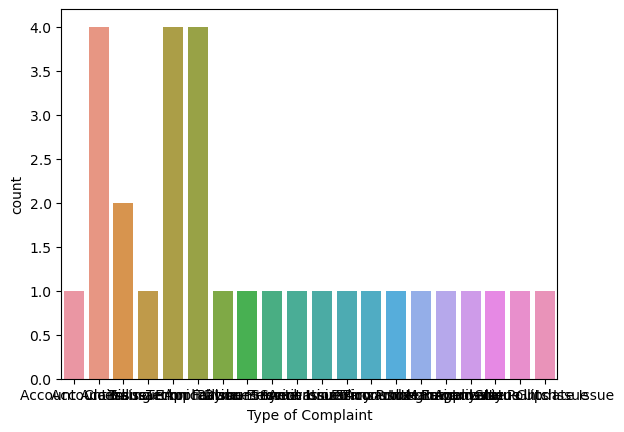

In [104]:
sns.countplot(x='Type of Complaint',data=df)

<Axes: xlabel='Support Level', ylabel='count'>

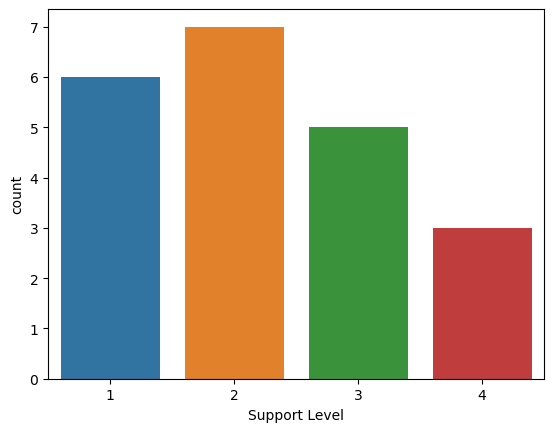

In [27]:
sns.countplot(x='Support Level',data=df)

In [28]:
# Load Pkgs
from sklearn.multioutput import MultiOutputClassifier

In [32]:
# Text Cleaning
!pip install neattext

In [33]:
import neattext.functions as nfx

In [36]:
df.head()

,Client Complaint,Ticket Body,Type of Product,Priority,Type of Complaint,Support Level
0,GSave Inaccessible Account,"Dear GCash Support, I am facing urgent issues ...",gsave,Urgent,Account Access,1
1,GInvest Portfolio Sync Issue,"Dear GCash Support, I have recently noticed di...",ginvest,Urgent,Account Issue,1
2,GInsure Claim Processing Delay,"Dear GCash Support, I submitted a claim under ...",ginsure,Urgent,Claim Issue,3
3,GCredit Reconciliation Error,"Dear GCash Support, My GCredit account is show...",gcredit,Not Urgent,Billing Error,2
4,GPadala Transfer Issue,"Dear GCash Support, I've attempted to send mon...",gpadala,Urgent,Transaction Failure,2


In [39]:
df['Complete Ticket'] = df['Client Complaint'].str.cat(df['Ticket Body'], sep='; ')
df.insert(loc=2, column='Complete Ticket', value=df.pop('Complete Ticket'))
df

,Client Complaint,Ticket Body,Complete Ticket,Type of Product,Priority,Type of Complaint,Support Level
0,GSave Inaccessible Account,"Dear GCash Support, I am facing urgent issues ...",GSave Inaccessible Account; Dear GCash Support...,gsave,Urgent,Account Access,1
1,GInvest Portfolio Sync Issue,"Dear GCash Support, I have recently noticed di...",GInvest Portfolio Sync Issue; Dear GCash Suppo...,ginvest,Urgent,Account Issue,1
2,GInsure Claim Processing Delay,"Dear GCash Support, I submitted a claim under ...",GInsure Claim Processing Delay; Dear GCash Sup...,ginsure,Urgent,Claim Issue,3
3,GCredit Reconciliation Error,"Dear GCash Support, My GCredit account is show...",GCredit Reconciliation Error; Dear GCash Suppo...,gcredit,Not Urgent,Billing Error,2
4,GPadala Transfer Issue,"Dear GCash Support, I've attempted to send mon...","GPadala Transfer Issue; Dear GCash Support, I'...",gpadala,Urgent,Transaction Failure,2
5,GLife App Integration Fault,"Dear GCash Support, GLife is not integrating w...",GLife App Integration Fault; Dear GCash Suppor...,glife,Normal,Technical Issue,1
6,GForest Carbon Footprint Miscalculation,"Dear GCash Support, My GForest account is not ...",GForest Carbon Footprint Miscalculation; Dear ...,gforest,Normal,Account Issue,4
7,GLoan Application Glitch,"Dear GCash Support, I am experiencing a recurr...","GLoan Application Glitch; Dear GCash Support, ...",gloan,Urgent,Application Error,1
8,GPay QR Code Reader Malfunction,"Dear GCash Support, The QR code reader within ...",GPay QR Code Reader Malfunction; Dear GCash Su...,gpay,Urgent,Technical Issue,2
9,GRemit Transaction Delay,"Dear GCash Support, There's a significant dela...","GRemit Transaction Delay; Dear GCash Support, ...",gremit,Normal,Transaction Failure,3


In [44]:
df['Support Level'] = df['Support Level'].astype(str)
df

,Client Complaint,Ticket Body,Complete Ticket,Type of Product,Priority,Type of Complaint,Support Level
0,GSave Inaccessible Account,"Dear GCash Support, I am facing urgent issues ...",GSave Inaccessible Account; Dear GCash Support...,gsave,Urgent,Account Access,1
1,GInvest Portfolio Sync Issue,"Dear GCash Support, I have recently noticed di...",GInvest Portfolio Sync Issue; Dear GCash Suppo...,ginvest,Urgent,Account Issue,1
2,GInsure Claim Processing Delay,"Dear GCash Support, I submitted a claim under ...",GInsure Claim Processing Delay; Dear GCash Sup...,ginsure,Urgent,Claim Issue,3
3,GCredit Reconciliation Error,"Dear GCash Support, My GCredit account is show...",GCredit Reconciliation Error; Dear GCash Suppo...,gcredit,Not Urgent,Billing Error,2
4,GPadala Transfer Issue,"Dear GCash Support, I've attempted to send mon...","GPadala Transfer Issue; Dear GCash Support, I'...",gpadala,Urgent,Transaction Failure,2
5,GLife App Integration Fault,"Dear GCash Support, GLife is not integrating w...",GLife App Integration Fault; Dear GCash Suppor...,glife,Normal,Technical Issue,1
6,GForest Carbon Footprint Miscalculation,"Dear GCash Support, My GForest account is not ...",GForest Carbon Footprint Miscalculation; Dear ...,gforest,Normal,Account Issue,4
7,GLoan Application Glitch,"Dear GCash Support, I am experiencing a recurr...","GLoan Application Glitch; Dear GCash Support, ...",gloan,Urgent,Application Error,1
8,GPay QR Code Reader Malfunction,"Dear GCash Support, The QR code reader within ...",GPay QR Code Reader Malfunction; Dear GCash Su...,gpay,Urgent,Technical Issue,2
9,GRemit Transaction Delay,"Dear GCash Support, There's a significant dela...","GRemit Transaction Delay; Dear GCash Support, ...",gremit,Normal,Transaction Failure,3


In [46]:
# Features & Labels
Xfeatures = df['Complete Ticket']
ylabels = df[['Type of Product','Priority','Type of Complaint','Support Level']]

In [47]:
# Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=7)

### Build A Pipeline for our Model

In [48]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),
                          ('lr_multi',MultiOutputClassifier(LogisticRegression()))])

In [49]:
# Fit on Dataset
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr_multi',
                 MultiOutputClassifier(estimator=LogisticRegression()))])

In [50]:
# Accuracy Score
pipe_lr.score(x_test,y_test)

0.0

In [55]:
sample_text = """
Subject Type: GSave Unrecognized Transaction Alert

Ticket Body:
Dear GCash Support,
I'm reaching out regarding a recent alert I received about a transaction on my GSave account that I do not recognize. The alert details a withdrawal that was made yesterday, which I did not authorize or execute. This is deeply concerning as it suggests a potential security issue with my account.
I have not shared my credentials with anyone and always ensure that my app and phone are secure. I've already changed my password and reviewed my recent transactions, but I would like GCash to investigate this matter further to prevent any future unauthorized access.
Please treat this as a high priority issue as it involves the security of my financial information and savings. I am available for any further information you might need to resolve this matter. A prompt and thorough investigation would be greatly appreciated.
Thank you for your immediate attention to this critical issue.
"""

In [74]:
# Sample Prediction
print(x_test.iloc[1])
print("Actual Prediction:",y_test.iloc[1])

GLife App Integration Fault; Dear GCash Support, GLife is not integrating with third-party services properly. Whenever I try to access the partner apps within GLife, the screen freezes or crashes. This issue has persisted for several days, hindering my access to essential services.
Actual Prediction: Type of Product                glife
Priority                      Normal
Type of Complaint    Technical Issue
Support Level                      1
Name: 5, dtype: object


In [75]:
ex1 = x_test.iloc[0]

In [76]:
sample_text

"\nSubject Type: GSave Unrecognized Transaction Alert\n\nTicket Body:\nDear GCash Support,\nI'm reaching out regarding a recent alert I received about a transaction on my GSave account that I do not recognize. The alert details a withdrawal that was made yesterday, which I did not authorize or execute. This is deeply concerning as it suggests a potential security issue with my account.\nI have not shared my credentials with anyone and always ensure that my app and phone are secure. I've already changed my password and reviewed my recent transactions, but I would like GCash to investigate this matter further to prevent any future unauthorized access.\nPlease treat this as a high priority issue as it involves the security of my financial information and savings. I am available for any further information you might need to resolve this matter. A prompt and thorough investigation would be greatly appreciated.\nThank you for your immediate attention to this critical issue.\n"

In [79]:
pipe_lr.predict([sample_text])

array([['gforest', 'Normal', 'Disbursement Issue', '2']], dtype=object)

In [81]:
# Prediction Prob
print(pipe_lr.classes_)
pipe_lr.predict_proba([sample_text])

[array(['gbills', 'gcredit', 'gforest', 'ginsure', 'glife', 'gloan',
       'gmessage', 'gpadala', 'gpay', 'gremit'], dtype=object), array(['Normal', 'Not Urgent', 'Urgent'], dtype=object), array(['Account Issue', 'Activation Error', 'Application Error',
       'Billing Error', 'Claim Issue', 'Disbursement Issue',
       'Payment Issue', 'Service Issue', 'Technical Issue',
       'Transaction Failure'], dtype=object), array(['1', '2', '3', '4'], dtype=object)]


[array([[0.0262588 , 0.1457619 , 0.28964058, 0.00915309, 0.07056951,
         0.22054398, 0.00944264, 0.15481382, 0.04877435, 0.02504133]]),
 array([[0.68713157, 0.05309701, 0.25977142]]),
 array([[0.21857574, 0.01977447, 0.00841103, 0.11276366, 0.00714948,
         0.33689879, 0.01985721, 0.00727509, 0.14014475, 0.12914977]]),
 array([[0.03003589, 0.68820951, 0.18410671, 0.09764788]])]

#### Using ML Estimators that support multi-output
+ KNN
+ RF
+ DT

In [90]:
pipe = Pipeline(steps=[('cv',CountVectorizer()),('rf',KNeighborsClassifier(n_neighbors=4))])

In [91]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('rf', KNeighborsClassifier(n_neighbors=4))])

In [114]:
arr = pipe.predict([sample_text])
value_1 = arr[0][0]  
value_2 = arr[0][1]  
value_3 = arr[0][2]  
value_4 = arr[0][3]

value_1

'gcredit'